<h1>Лаба №4</h1>
<h2>Студента БС-83</h2>
<h2>Кльоміна Павла</h2>

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [11]:
Data = [];
for i in range(6):
    if (i < 3):
        ran=sorted(np.random.normal(0, 1, size = 20))
        Data.append(ran)
    else:
        ran=sorted(np.random.exponential(2, 20))
        Data.append(ran)
for i in Data:
    print(str(i)+'\n')

[-1.2358424494596918, -1.1356561356890098, -1.0950061077142073, -0.9156439082724356, -0.6767860081472964, -0.5909685210678641, -0.5860106042276585, -0.3000488950409463, 0.0665704470683945, 0.2978083353982632, 0.3433581501555317, 0.4665073684769674, 0.4868647039410463, 0.5069636360395895, 0.5275136989513448, 0.576286223763593, 0.7618195668993591, 0.839411097135434, 1.0421098816647212, 1.4727380550194549]

[-2.2483799080876046, -1.452285184381865, -1.12002552656369, -1.1031521775976436, -0.755275059709999, -0.49819926468859926, -0.49021805845404154, -0.4411487789726132, -0.30547949319183626, -0.3042727231874256, -0.007446278792164142, 0.09215359019218099, 0.13895610683815532, 0.26400143545875626, 0.7683198085481714, 0.8638768193533612, 0.8754608569027025, 1.412298410692538, 1.5970007144544287, 2.209639201885216]

[-1.4031872087661386, -0.8149410539928711, -0.563024592945142, -0.1615077458037339, -0.12523487765966382, -0.0005108941274574334, 0.00030430462127812414, 0.05963299306906844, 0.

In [12]:
def schapiro(array,n):
    a = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    w_table = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][n]/1000

    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(array)
    nm = 0
    for i in array:
        nm += pow((i-m),2)
    b = 0
    for i in range(k):
        b += a[i]*(array[n-i-1] - array[i])
    w = (b**2)/nm
    
    if(w > w_table):
       
        return "normal"
    else:
        
        return "non-normal"

Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

(0.0, 1.0, 0.0, 1.0)

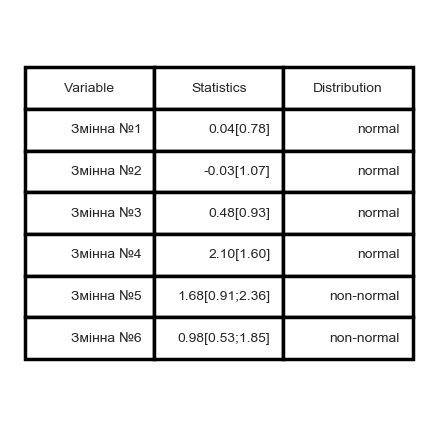

In [13]:
table_st = pd.DataFrame({
    'Variable': [("Змінна №"+str(i+1)) for i in range(6)], 
    'Statistics':
        ['%.2f[%.2f]' % (np.mean(Data[i]),np.std(Data[i]))
             if (schapiro(Data[i],20)=="normal") else 
         '%.2f[%.2f;%.2f]' % (np.median(Data[i]), np.quantile(Data[i],0.25),np.quantile(Data[i],0.75)) 
         for i in range(6)]
    , 
    'Distribution':[schapiro(Data[i],20) for i in range(6)]
})
my_table = plt.figure(figsize=(2,2), dpi=250)
ax=my_table.add_subplot(111)
cell_text = []
for row in range(len(table_st)):
    cell_text.append(table_st.iloc[row])
ax.table(cellText=cell_text, colLabels=table_st.columns, loc='center')
ax.axis('off')

Збереження Файлу

In [14]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()